In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
data_frame = pd.read_csv("Price_OutLiar_Removed_Dataset.csv")
data_frame

,Unnamed: 0,Brand,Model,YOM,Engine (cc),Gear,Fuel Type,Millage(KM),Town,Date,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price
0,0,AUDI,A1,2016,990.0,Automatic,Petrol,99000.0,Gampaha,2025-02-05,No Leasing,USED,Available,Available,Available,Available,100.00
1,1,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2025-01-14,No Leasing,USED,Available,Available,Available,Available,97.00
2,2,AUDI,A1,2018,1000.0,Automatic,Petrol,77000.0,Dehiwala-Mount-Lavinia,2025-01-23,No Leasing,USED,Available,Available,Available,Available,98.50
3,3,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Negombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,107.00
4,4,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,99.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9783,9784,ZOTYE,Z100,2018,1000.0,Manual,Petrol,77000.0,Dambulla,2024-12-16,No Leasing,USED,Available,Available,Available,Available,27.50
9784,9785,ZOTYE,Z100,2019,998.0,Manual,Petrol,66000.0,Nittambuwa,2024-12-12,No Leasing,USED,Available,Available,Available,Available,29.00
9785,9786,ZOTYE,Z100,2017,1000.0,Manual,Petrol,88000.0,Anuradapura,2024-12-04,No Leasing,USED,Available,Available,Available,Available,27.50
9786,9787,ZOTYE,ZOTYE,2017,1300.0,Manual,Petrol,88000.0,Gampaha,2025-01-13,No Leasing,USED,Available,Available,Not_Available,Available,8.75


In [3]:
data_frame.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
data_frame

,Brand,Model,YOM,Engine (cc),Gear,Fuel Type,Millage(KM),Town,Date,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price
0,AUDI,A1,2016,990.0,Automatic,Petrol,99000.0,Gampaha,2025-02-05,No Leasing,USED,Available,Available,Available,Available,100.00
1,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2025-01-14,No Leasing,USED,Available,Available,Available,Available,97.00
2,AUDI,A1,2018,1000.0,Automatic,Petrol,77000.0,Dehiwala-Mount-Lavinia,2025-01-23,No Leasing,USED,Available,Available,Available,Available,98.50
3,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Negombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,107.00
4,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,99.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9783,ZOTYE,Z100,2018,1000.0,Manual,Petrol,77000.0,Dambulla,2024-12-16,No Leasing,USED,Available,Available,Available,Available,27.50
9784,ZOTYE,Z100,2019,998.0,Manual,Petrol,66000.0,Nittambuwa,2024-12-12,No Leasing,USED,Available,Available,Available,Available,29.00
9785,ZOTYE,Z100,2017,1000.0,Manual,Petrol,88000.0,Anuradapura,2024-12-04,No Leasing,USED,Available,Available,Available,Available,27.50
9786,ZOTYE,ZOTYE,2017,1300.0,Manual,Petrol,88000.0,Gampaha,2025-01-13,No Leasing,USED,Available,Available,Not_Available,Available,8.75


In [5]:
data_frame["Model"].replace("MARUTI 800","MARUTI",inplace=True)

/tmp/ipykernel_26494/4022444379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame["Model"].replace("MARUTI 800","MARUTI",inplace=True)


In [6]:
grp_brand_model = data_frame.groupby(["Brand","Model"]).size().sort_values(ascending=False)
grp_brand_model = grp_brand_model[grp_brand_model > 40]
grp_brand_model

Brand       Model            
SUZUKI      ALTO                 392
TOYOTA      VITZ                 366
SUZUKI      MARUTI               292
            WAGON R STINGRAY     282
            WAGON R              203
PERODUA     VIVA ELITE           169
TOYOTA      AQUA                 167
SUZUKI      SWIFT                158
TOYOTA      AXIO                 148
NISSAN      FB15                 123
SUZUKI      ALTO JAPAN           117
TOYOTA      PREMIO G SUPERIOR    112
MICRO       PANDA                110
TOYOTA      PREMIO               110
            PRIUS                107
SUZUKI      WAGON R FZ           101
HONDA       FIT GP5               90
            FIT GP1               84
NISSAN      FB14                  72
TOYOTA      PASSO                 67
            ALLION                64
SUZUKI      ALTO 800              63
HYUNDAI     ACCENT                60
TOYOTA      BELTA                 59
MITSUBISHI  LANCER BOX            58
SUZUKI      SPACIA                58
TOYOTA  

<h3>According to the data set i will create a sub dataset that the vehicle count is greater than 40 by Brand and Model</h3>

In [8]:
selected_data_frame = pd.DataFrame()

for details in grp_brand_model.items():
    Brand = details[0][0]
    Model = details[0][1]
    sub_df = data_frame.loc[(data_frame.Brand==Brand)&(data_frame.Model==Model)]
    selected_data_frame = pd.concat([selected_data_frame,sub_df],ignore_index=True)
selected_data_frame

,Brand,Model,YOM,Engine (cc),Gear,Fuel Type,Millage(KM),Town,Date,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price
0,SUZUKI,ALTO,2015,800.0,Manual,Petrol,110000.0,Kandy,2025-02-05,No Leasing,USED,Available,Available,Not_Available,Available,34.250000
1,SUZUKI,ALTO,2012,800.0,Manual,Petrol,143000.0,Kegalle,2025-02-05,No Leasing,USED,Available,Available,Not_Available,Not_Available,27.100000
2,SUZUKI,ALTO,2018,660.0,Automatic,Petrol,77000.0,Matara,2025-02-05,No Leasing,USED,Available,Available,Available,Available,43.574612
3,SUZUKI,ALTO,2016,800.0,Manual,Petrol,99000.0,Ratnapura,2025-02-05,No Leasing,USED,Available,Available,Available,Available,33.750000
4,SUZUKI,ALTO,2016,800.0,Manual,Petrol,99000.0,Homagama,2025-02-05,No Leasing,USED,Available,Available,Not_Available,Available,34.414286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,TOYOTA,COROLLA 141,2008,1600.0,Automatic,Petrol,187000.0,Anuradapura,2024-12-12,Ongoing Lease,USED,Available,Available,Available,Available,68.300000
4725,TOYOTA,COROLLA 141,2007,1600.0,Automatic,Petrol,198000.0,Trincomalee,2024-12-09,No Leasing,USED,Available,Available,Available,Available,64.750000
4726,TOYOTA,COROLLA 141,2008,1600.0,Automatic,Petrol,187000.0,Colombo,2024-12-09,No Leasing,USED,Available,Available,Available,Available,66.500000
4727,TOYOTA,COROLLA 141,2008,1600.0,Automatic,Petrol,187000.0,Anuradapura,2024-12-05,No Leasing,USED,Available,Available,Available,Available,64.773810


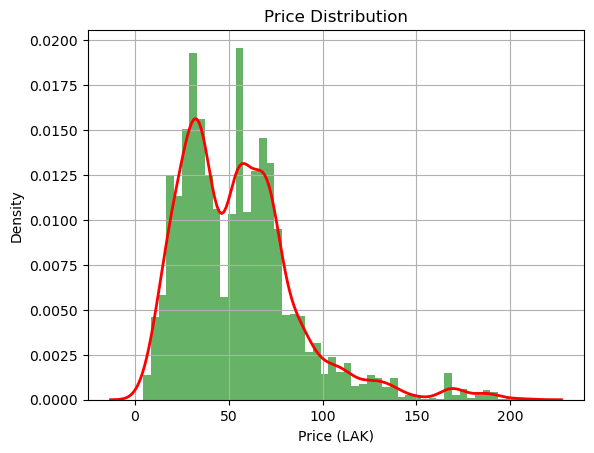

In [9]:
plt.hist(selected_data_frame["Price"], bins=50, density=True, alpha=0.6, color='g')
sns.kdeplot(selected_data_frame["Price"], color='red', linewidth=2)
plt.xlabel("Price (LAK)")
plt.ylabel("Density")
plt.title("Price Distribution")
plt.grid()
plt.show()

In [10]:
# Create New Column Brand_Model
selected_data_frame["Brand_Model"] = selected_data_frame["Brand"]+" "+selected_data_frame["Model"]
selected_data_frame

,Brand,Model,YOM,Engine (cc),Gear,Fuel Type,Millage(KM),Town,Date,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price,Brand_Model
0,SUZUKI,ALTO,2015,800.0,Manual,Petrol,110000.0,Kandy,2025-02-05,No Leasing,USED,Available,Available,Not_Available,Available,34.250000,SUZUKI ALTO
1,SUZUKI,ALTO,2012,800.0,Manual,Petrol,143000.0,Kegalle,2025-02-05,No Leasing,USED,Available,Available,Not_Available,Not_Available,27.100000,SUZUKI ALTO
2,SUZUKI,ALTO,2018,660.0,Automatic,Petrol,77000.0,Matara,2025-02-05,No Leasing,USED,Available,Available,Available,Available,43.574612,SUZUKI ALTO
3,SUZUKI,ALTO,2016,800.0,Manual,Petrol,99000.0,Ratnapura,2025-02-05,No Leasing,USED,Available,Available,Available,Available,33.750000,SUZUKI ALTO
4,SUZUKI,ALTO,2016,800.0,Manual,Petrol,99000.0,Homagama,2025-02-05,No Leasing,USED,Available,Available,Not_Available,Available,34.414286,SUZUKI ALTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,TOYOTA,COROLLA 141,2008,1600.0,Automatic,Petrol,187000.0,Anuradapura,2024-12-12,Ongoing Lease,USED,Available,Available,Available,Available,68.300000,TOYOTA COROLLA 141
4725,TOYOTA,COROLLA 141,2007,1600.0,Automatic,Petrol,198000.0,Trincomalee,2024-12-09,No Leasing,USED,Available,Available,Available,Available,64.750000,TOYOTA COROLLA 141
4726,TOYOTA,COROLLA 141,2008,1600.0,Automatic,Petrol,187000.0,Colombo,2024-12-09,No Leasing,USED,Available,Available,Available,Available,66.500000,TOYOTA COROLLA 141
4727,TOYOTA,COROLLA 141,2008,1600.0,Automatic,Petrol,187000.0,Anuradapura,2024-12-05,No Leasing,USED,Available,Available,Available,Available,64.773810,TOYOTA COROLLA 141


In [11]:
selected_data_frame["Millage(KM)"].describe()

count      4729.000000
mean     163069.359273
std       75512.640623
min       11000.000000
25%      110000.000000
50%      143000.000000
75%      198000.000000
max      517000.000000
Name: Millage(KM), dtype: float64

In [12]:
max_mileage = selected_data_frame['Millage(KM)'].max()
millage_steps = [millage for millage in range(0,int(max_mileage+10000),10000)]
millage_groups = [f"{millage} - {millage+10000}"for millage in millage_steps[:-1]]
millage_groups[14]

'140000 - 150000'

In [13]:
def millage_group_selector(millage):
    millage_grp_index = (millage//10000)
    millage_grp_index = int(millage_grp_index)
    return millage_groups[millage_grp_index]

In [14]:
selected_data_frame["Millage Range"] = selected_data_frame["Millage(KM)"].apply(millage_group_selector)

In [15]:
selected_data_frame.sample(5)

,Brand,Model,YOM,Engine (cc),Gear,Fuel Type,Millage(KM),Town,Date,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price,Brand_Model,Millage Range
2126,TOYOTA,AXIO,2015,1500.0,Automatic,Hybrid,110000.0,Colombo,2024-12-30,No Leasing,USED,Available,Available,Available,Available,112.636364,TOYOTA AXIO,110000 - 120000
1801,TOYOTA,AQUA,2015,1500.0,Automatic,Petrol,110000.0,Bandaragama,2024-12-31,No Leasing,USED,Available,Available,Available,Available,83.750000,TOYOTA AQUA,110000 - 120000
3022,HONDA,FIT GP5,2013,1490.0,Automatic,Hybrid,132000.0,Kandy,2024-12-28,No Leasing,USED,Available,Available,Available,Available,79.000000,HONDA FIT GP5,130000 - 140000
336,SUZUKI,ALTO,2015,800.0,Manual,Petrol,110000.0,Kalutara,2024-12-15,No Leasing,USED,Available,Not_Available,Not_Available,Not_Available,33.900000,SUZUKI ALTO,110000 - 120000
427,TOYOTA,VITZ,2007,1000.0,Automatic,Petrol,198000.0,Colombo,2025-02-04,No Leasing,USED,Available,Available,Available,Available,53.810526,TOYOTA VITZ,190000 - 200000


In [16]:
selected_data_frame.Brand_Model.value_counts()

Brand_Model
SUZUKI ALTO                 392
TOYOTA VITZ                 366
SUZUKI MARUTI               292
SUZUKI WAGON R STINGRAY     282
SUZUKI WAGON R              203
PERODUA VIVA ELITE          169
TOYOTA AQUA                 167
SUZUKI SWIFT                158
TOYOTA AXIO                 148
NISSAN FB15                 123
SUZUKI ALTO JAPAN           117
TOYOTA PREMIO G SUPERIOR    112
TOYOTA PREMIO               110
MICRO PANDA                 110
TOYOTA PRIUS                107
SUZUKI WAGON R FZ           101
HONDA FIT GP5                90
HONDA FIT GP1                84
NISSAN FB14                  72
TOYOTA PASSO                 67
TOYOTA ALLION                64
SUZUKI ALTO 800              63
HYUNDAI ACCENT               60
TOYOTA BELTA                 59
SUZUKI SPACIA                58
MITSUBISHI LANCER BOX        58
TOYOTA CARINA                56
SUZUKI CELERIO               56
TOYOTA YARIS                 55
TOYOTA COROLLA 121           55
TOYOTA ALLION 260           

In [17]:
selected_data_frame["YOM"] = selected_data_frame["YOM"].astype("object")

In [18]:
selected_data_frame.dtypes

Brand              object
Model              object
YOM                object
Engine (cc)       float64
Gear               object
Fuel Type          object
Millage(KM)       float64
Town               object
Date               object
Leasing            object
Condition          object
AIR CONDITION      object
POWER STEERING     object
POWER MIRROR       object
POWER WINDOW       object
Price             float64
Brand_Model        object
Millage Range      object
dtype: object

In [19]:
selected_data_frame1 = selected_data_frame[["Brand_Model","YOM","Gear","Fuel Type","Millage Range","Leasing","Condition","AIR CONDITION","POWER STEERING","POWER MIRROR","POWER WINDOW","Price"]]

In [20]:
selected_data_frame1

,Brand_Model,YOM,Gear,Fuel Type,Millage Range,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price
0,SUZUKI ALTO,2015,Manual,Petrol,110000 - 120000,No Leasing,USED,Available,Available,Not_Available,Available,34.250000
1,SUZUKI ALTO,2012,Manual,Petrol,140000 - 150000,No Leasing,USED,Available,Available,Not_Available,Not_Available,27.100000
2,SUZUKI ALTO,2018,Automatic,Petrol,70000 - 80000,No Leasing,USED,Available,Available,Available,Available,43.574612
3,SUZUKI ALTO,2016,Manual,Petrol,90000 - 100000,No Leasing,USED,Available,Available,Available,Available,33.750000
4,SUZUKI ALTO,2016,Manual,Petrol,90000 - 100000,No Leasing,USED,Available,Available,Not_Available,Available,34.414286
...,...,...,...,...,...,...,...,...,...,...,...,...
4724,TOYOTA COROLLA 141,2008,Automatic,Petrol,180000 - 190000,Ongoing Lease,USED,Available,Available,Available,Available,68.300000
4725,TOYOTA COROLLA 141,2007,Automatic,Petrol,190000 - 200000,No Leasing,USED,Available,Available,Available,Available,64.750000
4726,TOYOTA COROLLA 141,2008,Automatic,Petrol,180000 - 190000,No Leasing,USED,Available,Available,Available,Available,66.500000
4727,TOYOTA COROLLA 141,2008,Automatic,Petrol,180000 - 190000,No Leasing,USED,Available,Available,Available,Available,64.773810


In [21]:
y = selected_data_frame.Price
X = selected_data_frame1.drop("Price",axis=1)

In [22]:
for column in X.columns:
    print(column)

Brand_Model
YOM
Gear
Fuel Type
Millage Range
Leasing
Condition
AIR CONDITION
POWER STEERING
POWER MIRROR
POWER WINDOW


In [23]:
from sklearn.preprocessing import LabelEncoder 

encoded_X = pd.DataFrame()

label_encoders = {}

for column in X.columns:
    label_encoder = LabelEncoder()
    encoded_X[f"encoded_{column}"] = label_encoder.fit_transform(X[column])
    label_encoders[column] = label_encoder

encoded_X

,encoded_Brand_Model,encoded_YOM,encoded_Gear,encoded_Fuel Type,encoded_Millage Range,encoded_Leasing,encoded_Condition,encoded_AIR CONDITION,encoded_POWER STEERING,encoded_POWER MIRROR,encoded_POWER WINDOW
0,14,37,1,3,1,0,1,0,0,1,0
1,14,34,1,3,4,0,1,0,0,1,1
2,14,40,0,3,43,0,1,0,0,0,0
3,14,38,1,3,45,0,1,0,0,0,0
4,14,38,1,3,45,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4724,40,30,0,3,8,1,1,0,0,0,0
4725,40,29,0,3,9,0,1,0,0,0,0
4726,40,30,0,3,8,0,1,0,0,0,0
4727,40,30,0,3,8,0,1,0,0,0,0


<h3>Save Encoder for After Use</h3>

In [138]:
with open('encoder.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

<h3>Find the Best Model and Best Parameters</h3>

In [27]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 5, 10] 
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'criterion': ['squared_error', 'friedman_mse'],
                'max_depth': [None, 5, 10]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])




In [28]:
results = find_best_model_using_gridsearchcv(encoded_X, y)
results

,model,best_score,best_params
0,linear_regression,0.575091,{'fit_intercept': False}
1,decision_tree,0.976858,"{'criterion': 'friedman_mse', 'max_depth': Non..."
2,random_forest,0.980562,"{'criterion': 'squared_error', 'max_depth': No..."


In [99]:
results.loc[2]["best_params"]

{'criterion': 'squared_error', 'max_depth': None, 'n_estimators': 100}

<h3>Data Splitting</h3>

In [105]:
X_train,X_test,Y_train,Y_test = train_test_split(encoded_X,y,test_size=0.2,random_state=10)

<h3>Model Creation and Training</h3>

In [103]:
model = RandomForestRegressor(n_estimators=100,criterion="squared_error",max_depth=None)

In [107]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [109]:
model.score(X_test,Y_test)

0.9776409591254369

In [132]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [156]:
selected_data_frame1

,Brand_Model,YOM,Gear,Fuel Type,Millage Range,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price
0,SUZUKI ALTO,2015,Manual,Petrol,110000 - 120000,No Leasing,USED,Available,Available,Not_Available,Available,34.250000
1,SUZUKI ALTO,2012,Manual,Petrol,140000 - 150000,No Leasing,USED,Available,Available,Not_Available,Not_Available,27.100000
2,SUZUKI ALTO,2018,Automatic,Petrol,70000 - 80000,No Leasing,USED,Available,Available,Available,Available,43.574612
3,SUZUKI ALTO,2016,Manual,Petrol,90000 - 100000,No Leasing,USED,Available,Available,Available,Available,33.750000
4,SUZUKI ALTO,2016,Manual,Petrol,90000 - 100000,No Leasing,USED,Available,Available,Not_Available,Available,34.414286
...,...,...,...,...,...,...,...,...,...,...,...,...
4724,TOYOTA COROLLA 141,2008,Automatic,Petrol,180000 - 190000,Ongoing Lease,USED,Available,Available,Available,Available,68.300000
4725,TOYOTA COROLLA 141,2007,Automatic,Petrol,190000 - 200000,No Leasing,USED,Available,Available,Available,Available,64.750000
4726,TOYOTA COROLLA 141,2008,Automatic,Petrol,180000 - 190000,No Leasing,USED,Available,Available,Available,Available,66.500000
4727,TOYOTA COROLLA 141,2008,Automatic,Petrol,180000 - 190000,No Leasing,USED,Available,Available,Available,Available,64.773810


<h1>Prediction</h1>

In [170]:
prediction_Df = pd.DataFrame({
  "Brand_Model": ["TOYOTA COROLLA 141"],
  "YOM": [2008],
  "Gear": ["Automatic"],
  "Fuel Type": ["Petrol"],
  "Millage Range": ['190000 - 200000'],
  "Leasing": ["No Leasing"],
  "Condition": ["USED"],
  "AIR CONDITION": ["Not_Available"],
  "POWER STEERING": ["Not_Available"],
  "POWER MIRROR": ["Available"],
  "POWER WINDOW": ["Available"]
})

In [166]:
with open('encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [172]:
encoded_new_df = pd.DataFrame()

for column in prediction_Df.columns:
    if column in label_encoders:
        encoded_new_df[f"encoded_{column}"] = label_encoders[column].transform(new_df[column])
    else:
        print(f"Warning: Column {column} not found in label encoders.")

encoded_new_df = encoded_new_df[encoded_X.columns]

predicted_price = model.predict(encoded_new_df)
print(f"Predicted Price: {predicted_price[0]:,.2f}")


Predicted Price: 70.27
